# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/cs109a_midterm.csv')

In [3]:
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.



In [ ]:
sig_b_df

In [4]:
## 1. create DELAY_OR_NOT
df['DELAY_OR_NOT'] = df['ARRIVAL_DELAY'].apply(lambda x: x >= 15)
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,False
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,False
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,False
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,False
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,False


#### 2. List predictors that should not be used
The basic idea here is to drop columns that are reduncdant (contained by other information), unuseful (not related to flight delay intuitively) and information received after departure (otherwise we could calculate the result directly).

DATE: Information in column DATE is already included in MONTH and DAY because these are dates in 2015. So this column can not be used, otherwise there is multicolinearity.

MONTH/DAY/DAY_OF_WEEK: This kinds of date information is useful because delay might depend on weather (affects weather_delay), crowdness of airport and numnber of customers (affects security_delay) etc. So information about date is important.

AIRLINE: important. Since it is related to delay caused by airline (airline_delay).

FLIGHT_NUMBER/ TAIL_NUMBER: unnecessary. 

ORIGIN_AIRPORT/DESTINATION_AIRPORT: important. Since intuitively delays might be due to the bad operation/management in departure/arrival airport.

DISTANCE: might be useful. Since longer distance can provide the flight some space to adjust the travel length.

SCHE-DEP / SCHEDULED-TIME: might be useful. Since it is related to the airport traffic, travel length, and so on, which are all likely to lead to delay.

SCHED_ARR: can be calculated by SCHE-DEP and SCHEDULED-TIME. So it should be dropped otherwise there is colinearity.

DEPARTURE_DELAY: this is information achieved after departure. It is almost linear to arrival delay, which should not be used.

ELAPSED_TIME: it's a kind of information which can only be achieved after departure. It provides an indirect way to calculate the delay information so we should not use it.

AIR_SYSTEM-DELAY/SECURITY_DELAY/AIRLINE_DELAY/LATE_AIRCRAFT_DELAY/WEATHER_DELAY: too many NAN here to be used. Also it is directly related to the result (sum of them are ARRIVAL_DELAY), while this information is what we don't know when we predict the flight.

In summary, we should drop 'DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHED_ARR', 'ELAPSED_TIME','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [5]:
## 3. EDA

# delay_rate ~ airlines
airline_count = df.groupby('AIRLINE').DELAY_OR_NOT.count()
airline_delay = df.groupby('AIRLINE').DELAY_OR_NOT.sum()
airline_delay_rate = airline_delay / airline_count

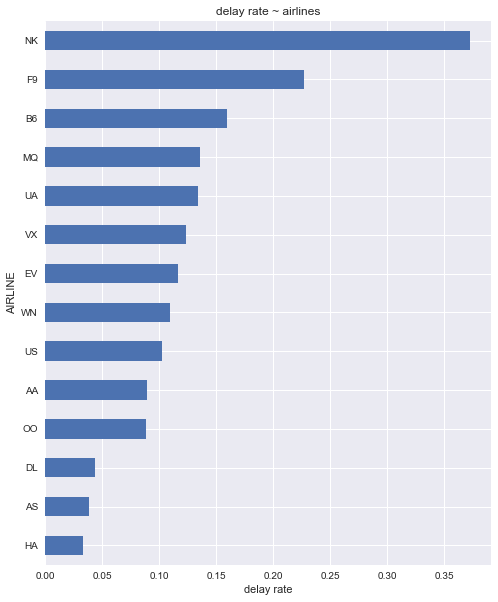

In [6]:
plt.figure(figsize=(8, 10))
ax = plt.gca()
airline_delay_rate = airline_delay_rate.sort_values()
airline_delay_rate.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay rate')
plt.title('delay rate ~ airlines')
sns.despine()

We can see delay rate (number of delay / number of flights of airlines) greatly depends on airlines. Now let's have a deeper look at the distribution of delay (ARRIVAL_DELAY) across the airlines.

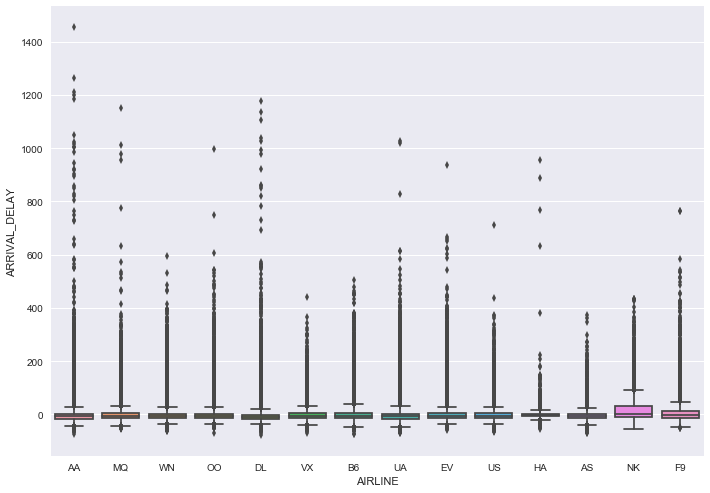

In [7]:
## delay-or-not
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="AIRLINE", y="ARRIVAL_DELAY", data=df)

Consistent with the first graph, airlines such as NK, F9 has higher delay rate would also have relatively higher mean and larger 25%-75% quantile in length of delay. But we also notice some of the flight have lower delay rate though, they still have longer tail (right-skewed). This is because these airlines might have larger number of flights so there will be higher chance to have extreme event happen.

In [8]:
# transform schedule_departure into minute form

df['SCHED_DEP'] = df['SCHED_DEP'].apply(lambda x: int(x[-5:-3]) + int(x[-8:-6])* 60)
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,435,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,False
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,1215,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,False
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,742,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,False
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,680,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,False
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,850,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,False


We tranform the time format into minute based, numerical data. That is, 12am would start at 0. Then we want to see the relationship between the lenght of delay and time of departure (we use scheduled time here because it is unreasonable to make use of information after actual departure).

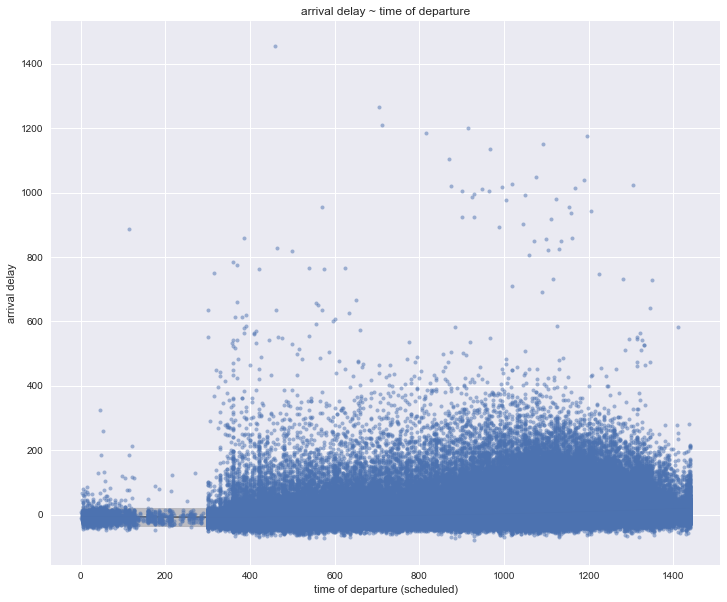

In [9]:
# delay ~ time of departure
plt.figure(figsize=(12, 10))
x = df.SCHED_DEP
y = df.ARRIVAL_DELAY
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(df.SCHED_DEP, df.ARRIVAL_DELAY, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
plt.xlabel('time of departure (scheduled)')
plt.ylabel('arrival delay')
plt.title('arrival delay ~ time of departure')

We can see the spread of length of delay is larger in the day time. Especially, there is an interval between 100 - 300 minute, i.e., 2am to 5am, such that the arrival_delay is relatively small. This is because there are fewer flights during this period, while greater number of flights would lead to airport traffic to be busy. 

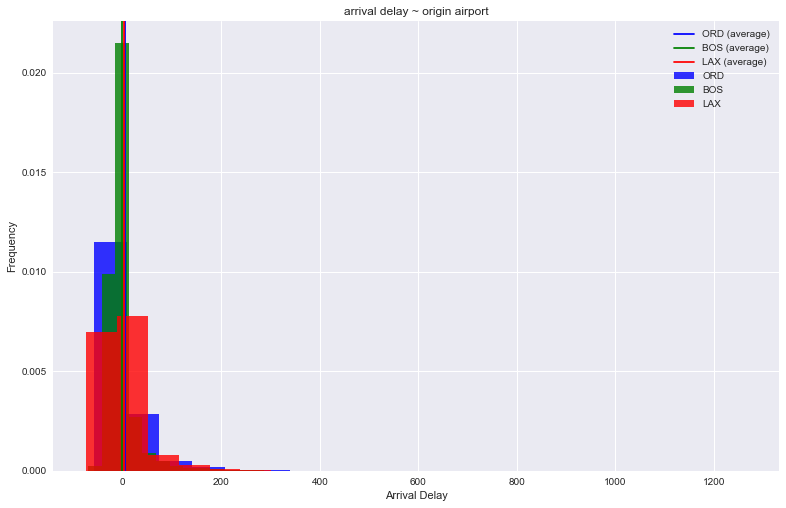

In [10]:
# arrival-delay ~ origin airport
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.27)
df[df['ORIGIN_AIRPORT']=='ORD']['ARRIVAL_DELAY'].plot.hist(alpha=0.8, bins=20, color = 'b',normed=True, label='ORD');
plt.axvline(x=df[df['ORIGIN_AIRPORT']=='ORD']['ARRIVAL_DELAY'].mean(), color='b', label='ORD (average)');
df[df['ORIGIN_AIRPORT']=='BOS']['ARRIVAL_DELAY'].plot.hist(alpha=0.8, bins=20, color = 'g', normed=True, label='BOS');
plt.axvline(x=df[df['ORIGIN_AIRPORT']=='BOS']['ARRIVAL_DELAY'].mean(), color='g', label='BOS (average)');
df[df['ORIGIN_AIRPORT']=='JFK']['ARRIVAL_DELAY'].plot.hist(alpha=0.8, bins=20, color = 'r',normed=True, label='LAX');
plt.axvline(x=df[df['ORIGIN_AIRPORT']=='JFK']['ARRIVAL_DELAY'].mean(), color='r', label='LAX (average)');
plt.xlabel('Arrival Delay');
plt.ylabel('Frequency');
plt.title('arrival delay ~ origin airport')
plt.legend(loc='upper right');

I first take a glance on the distribution of Arrival_delay across three airports: ORD, BOS and LAX. But the result is not obvious since the distribution is right-skewed. So I do the following exploration (and add two more airports: JFK and 10165 for comparisons).

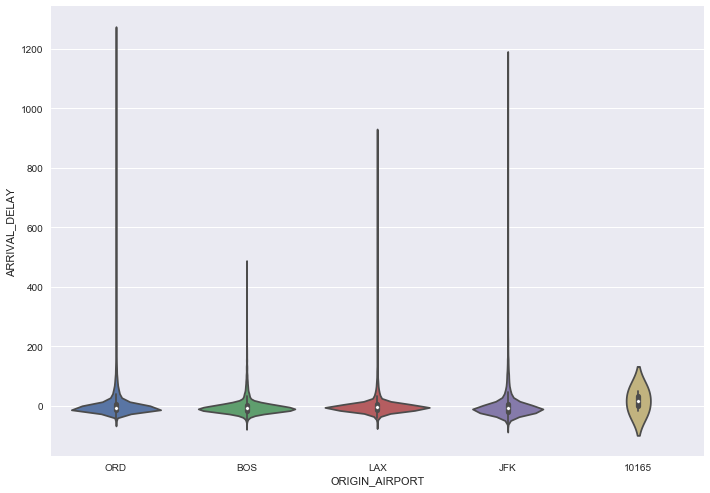

In [11]:
df_airport_1 = df[df.ORIGIN_AIRPORT == 'ORD']
df_airport_2 = df[df.ORIGIN_AIRPORT == 'BOS']
df_airport_3 = df[df.ORIGIN_AIRPORT == 'LAX']
df_airport_4 = df[df.ORIGIN_AIRPORT == 'JFK']
df_airport_5 = df[df.ORIGIN_AIRPORT == '10165']

df_airport = df_airport_1.append(df_airport_2, ignore_index=True)
df_airport = df_airport.append(df_airport_3, ignore_index=True)
df_airport = df_airport.append(df_airport_4, ignore_index=True)
df_airport = df_airport.append(df_airport_5, ignore_index=True)


fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x="ORIGIN_AIRPORT", y="ARRIVAL_DELAY", data=df_airport)

First, let's look at origin airport. We try to incorporate as much information as possible into the violin plot and we could see the shape of length of delay distributed very differently across airports. For example, BOS and 10165 might have fewer flights compared to other three airports, so their distribution of delay is more concetrated. However, the overall mean of delay at 10165 is the greatest. On the contrary, airports like ORD would have some chance to encounter super long delay, but its overall delay performance is ok.

In [12]:
airport_count = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.count()
airport_delay = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.sum()
airport_delay_rate = airport_delay / airport_count

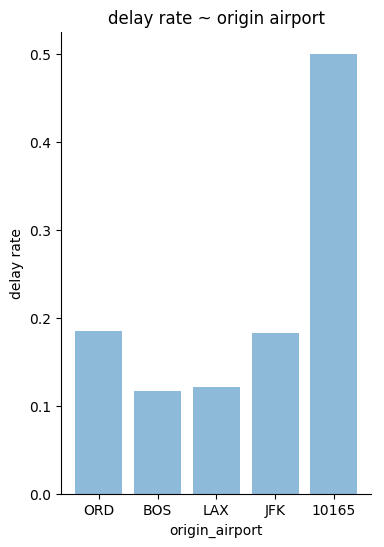

In [13]:
airport = []
airport_ls = ['ORD','BOS','LAX','JFK','10165']
airport.append(airport_delay_rate['ORD'])
airport.append(airport_delay_rate['BOS'])
airport.append(airport_delay_rate['LAX'])
airport.append(airport_delay_rate['JFK'])
airport.append(airport_delay_rate['10165'])
plt.figure(figsize=(4, 6))
ax = plt.gca()
plt.bar(np.arange(len(airport_ls)), airport, align='center', alpha=0.5)
plt.xticks(np.arange(len(airport_ls)), airport_ls)
plt.xlabel('origin_airport')
plt.ylabel('delay rate')
plt.title('delay rate ~ origin airport')
sns.despine()

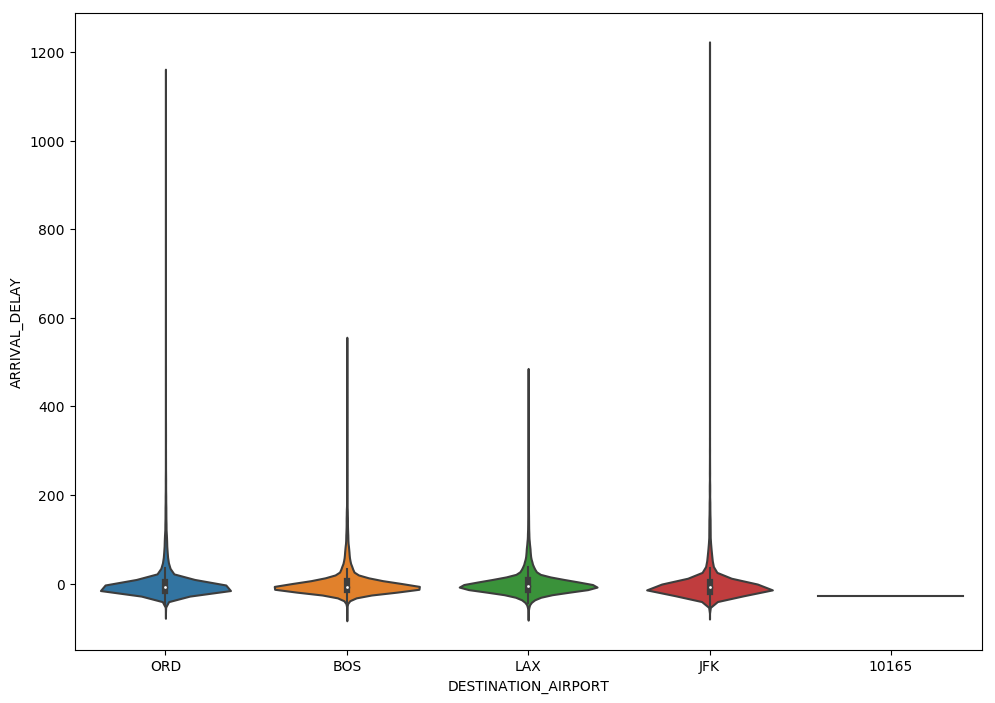

In [14]:
## delay ~ destination airport

df_airport_1 = df[df.DESTINATION_AIRPORT == 'ORD']
df_airport_2 = df[df.DESTINATION_AIRPORT == 'BOS']
df_airport_3 = df[df.DESTINATION_AIRPORT == 'LAX']
df_airport_4 = df[df.DESTINATION_AIRPORT == 'JFK']
df_airport_5 = df[df.DESTINATION_AIRPORT == '10165']

df_airport = df_airport_1.append(df_airport_2, ignore_index=True)
df_airport = df_airport.append(df_airport_3, ignore_index=True)
df_airport = df_airport.append(df_airport_4, ignore_index=True)
df_airport = df_airport.append(df_airport_5, ignore_index=True)


fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x="DESTINATION_AIRPORT", y="ARRIVAL_DELAY", data=df_airport)

In [15]:
airport_count = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.count()
airport_delay = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.sum()
airport_delay_rate = airport_delay / airport_count

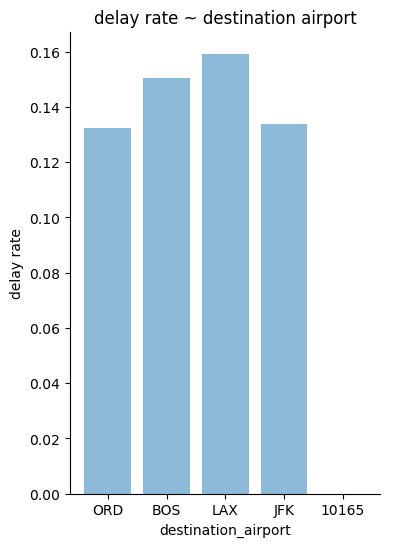

In [16]:
airport = []
airport_ls = ['ORD','BOS','LAX','JFK','10165']
airport.append(airport_delay_rate['ORD'])
airport.append(airport_delay_rate['BOS'])
airport.append(airport_delay_rate['LAX'])
airport.append(airport_delay_rate['JFK'])
airport.append(airport_delay_rate['10165'])
plt.figure(figsize=(4, 6))
ax = plt.gca()
plt.bar(np.arange(len(airport_ls)), airport, align='center', alpha=0.5)
plt.xticks(np.arange(len(airport_ls)), airport_ls)
plt.xlabel('destination_airport')
plt.ylabel('delay rate')
plt.title('delay rate ~ destination airport')
sns.despine()

In [17]:
## delay ~ airport traffic (number of flights)

traffic_count = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.count()
traffic_delay = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.sum()

It's hard to define airport traffic since they are so many confounding factors. Here based on the information we have, we could assumme airport traffic is proportional to the number of flights at this airport. For each airport, we look at an overall data in year since the total number of flights could represent as an indicator of traffic.

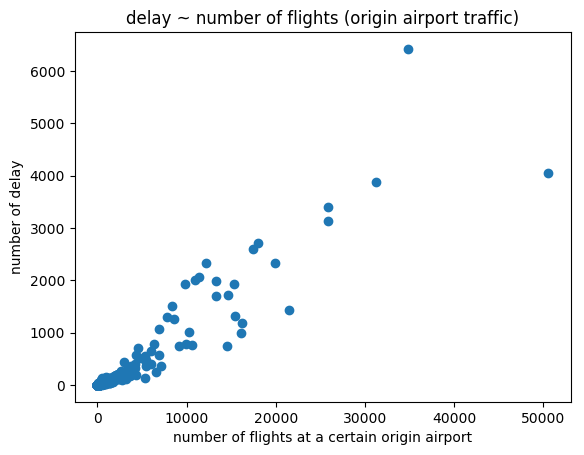

In [18]:
plt.scatter(traffic_count, traffic_delay)
plt.xlabel('number of flights at a certain origin airport')
plt.ylabel('number of delay')
plt.title('delay ~ number of flights (origin airport traffic)')

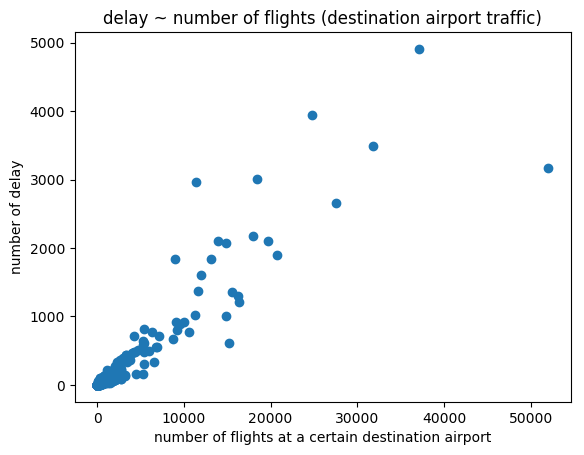

In [19]:
traffic_count = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.count()
traffic_delay = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.sum()
plt.scatter(traffic_count, traffic_delay)
plt.xlabel('number of flights at a certain destination airport')
plt.ylabel('number of delay')
plt.title('delay ~ number of flights (destination airport traffic)')

We could see the number of delay is proportional to number of flights no matter for origin airport and destination airports. Therefore, we may infer that there are positive relationship between delay and airport traffic.

In [ ]:
## delay ~ other numerical predictor (distance & scheduled_time)

from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(df[['DISTANCE', 'SCHEDULED_TIME', 'ARRIVAL_DELAY']], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

I also plot a figure to see relationship between length of delay and distance. It satisfies with my guess in part(2) that longer distance flight might have shorter delay. Since they have longer distance to adjust the speed and usually they are international flight that most of them won't delay.

In [21]:
## 4. Classification model

## drop unnecessary variable
col_drop = ['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHED_ARR', 'ELAPSED_TIME', \
            'DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', \
            'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df = df.drop(col_drop, 1)
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,435,1.0,733,135.0,False
1,10,28,3,AA,11298,13342,1215,-31.0,853,149.0,False
2,8,19,3,MQ,XNA,ORD,742,-21.0,522,108.0,False
3,12,1,2,WN,PHX,BWI,680,-14.0,1999,260.0,False
4,9,15,2,WN,MCI,DEN,850,-12.0,533,105.0,False


In [22]:
## labelencoder

le = preprocessing.LabelEncoder()
le.fit(df.ORIGIN_AIRPORT)
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].apply(lambda x: le.transform([x]))

In [23]:
le2 = preprocessing.LabelEncoder()
le2.fit(df.DESTINATION_AIRPORT)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].apply(lambda x: le2.transform([x]))

In [24]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].apply(lambda x: x[0])
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].apply(lambda x: x[0])

In [25]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,534,487,435,1.0,733,135.0,False
1,10,28,3,AA,81,193,1215,-31.0,853,149.0,False
2,8,19,3,MQ,625,533,742,-21.0,522,108.0,False
3,12,1,2,WN,545,356,680,-14.0,1999,260.0,False
4,9,15,2,WN,498,390,850,-12.0,533,105.0,False


In [26]:
# preprocessing the data

## convert dummy variable

categorical_columns = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE']
numerical_columns = ['DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT,MONTH_2,MONTH_3,MONTH_4,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,534,487,435,1.0,733,135.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,81,193,1215,-31.0,853,149.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,625,533,742,-21.0,522,108.0,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,545,356,680,-14.0,1999,260.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,498,390,850,-12.0,533,105.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
## create training/testing data set
np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.75
train_df = df[msk]
test_df = df[~msk]

In [28]:
y_train_large = train_df.DELAY_OR_NOT.values
y_test_large = test_df.DELAY_OR_NOT.values

# test_df.describe()

In [29]:
## normalize numerical column

# mean = train_df[numerical_columns].mean()
# std = train_df[numerical_columns].std()

# train_df[numerical_columns] = (train_df[numerical_columns] - mean)/std
# test_df[numerical_columns] = (test_df[numerical_columns] - mean)/std

train_df2 = train_df[train_df.DELAY_OR_NOT == True]
test_df2 = test_df[test_df.DELAY_OR_NOT == True]

train_df = train_df.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)
test_df = test_df.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)

In [30]:
X_train_large = train_df.iloc[:,:].values
X_test_large = test_df.iloc[:,:].values

std_scale = preprocessing.StandardScaler().fit(X_train_large)

X_train_large = std_scale.transform(X_train_large)
X_test_large = std_scale.transform(X_test_large)

In [31]:
## sub-sample

np.random.seed(6006)
msk_2 = np.random.rand(len(train_df)) < 0.5
X_train = X_train_large[msk_2]
y_train = y_train_large[msk_2]
X_test = X_train_large[~msk_2]
y_test = y_train_large[~msk_2]

In [32]:
# logistic regression cv

logregcv = LogisticRegressionCV(random_state = 123) # By default LBGFS induces L2 norm.
logregcv.fit(X_train, y_train)
y_hat_train = logregcv.predict(X_train)
y_hat_test = logregcv.predict(X_test)
print("Train accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", accuracy_score(y_test, y_hat_test))

Train accuracy:  0.907411953608
Test accuracy:  0.907439846642


In [33]:
conf_mat = confusion_matrix(y_test, y_hat_test)
conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=false', 'y_hat = true'], index = ['y=false', 'y=true'])
conf_df

,y_hat=false,y_hat = true
y=false,269548,2196
y=true,25809,5007


In [34]:
print("True Positive Rate for Fitted: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate for Fitted: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

True Positive Rate for Fitted:  0.162480529595
True Negative Rate for Fitted:  0.991918864814


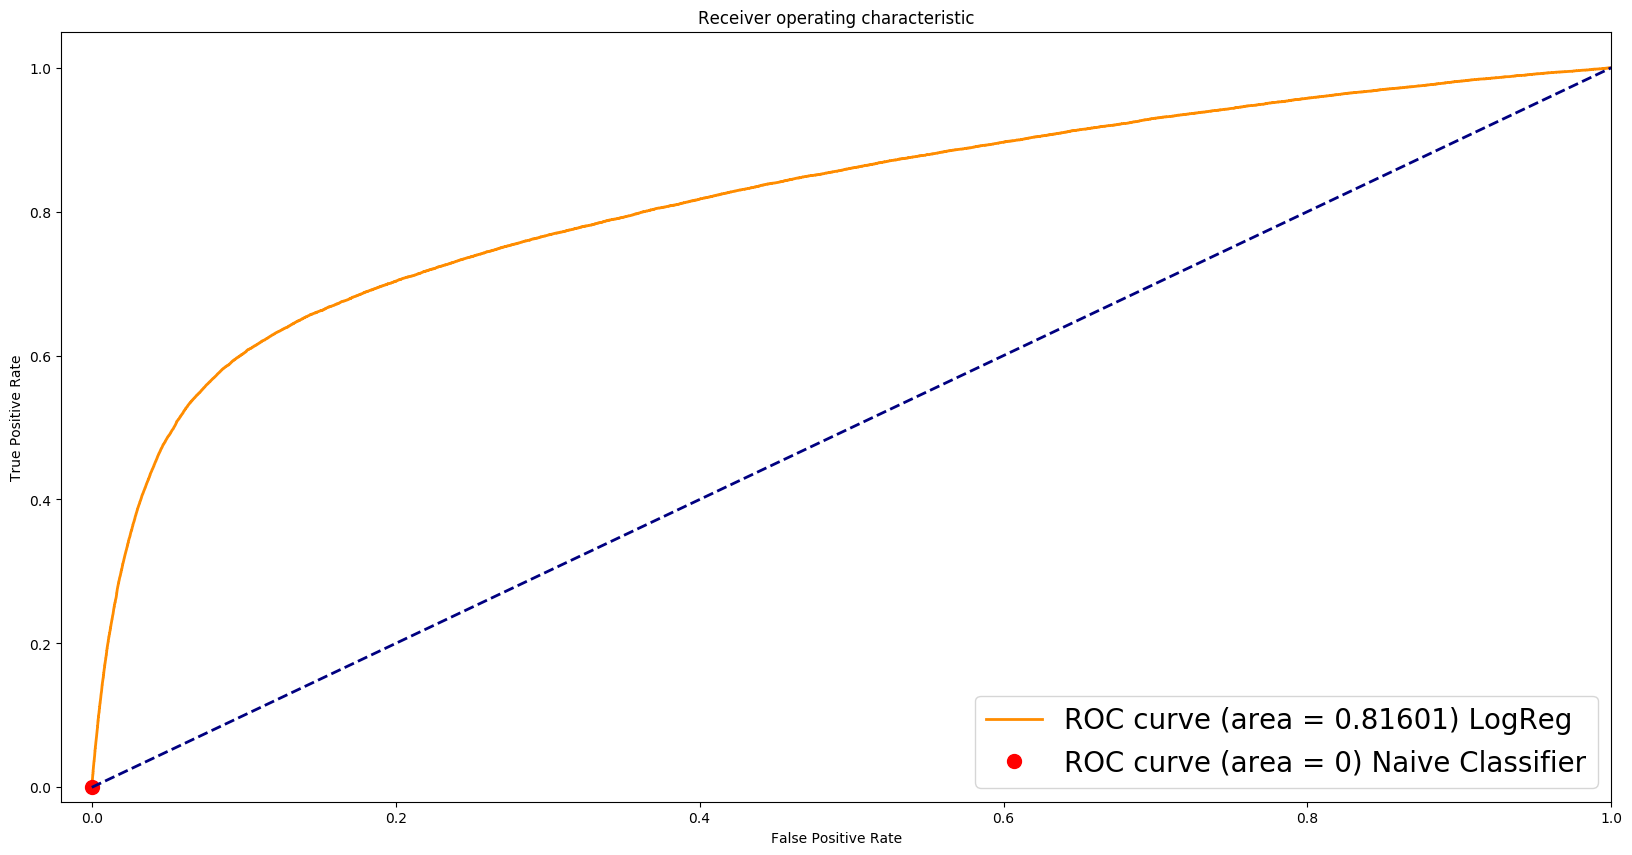

In [35]:
preds = logregcv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

In [36]:
## 5. Importance of factors

b_logreg = logregcv.coef_[0]

iterations = 100

b_logreg_boot = np.zeros((len(X_train[0]), iterations))

for i in range(iterations):
    # sample with replacement from X_train
    boot_rows = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_train_boot = X_train[boot_rows]
    y_train_boot = y_train[boot_rows]

    # fit
    logreg_boot = LogisticRegression(C=100000, fit_intercept=False)
    logreg_boot.fit(X_train_boot, y_train_boot)
    b_logreg_boot[:,i] = logreg_boot.coef_


In [37]:
# construct confidence intervals
b_logreg_ci_upper = np.percentile(b_logreg_boot, 97.5, axis=1)
b_logreg_ci_lower = np.percentile(b_logreg_boot, 2.5, axis=1)

# ct significant predictors
sig_b_ct = 0

# if ci contains 0, then insignificant
for i in range(len(X_train[0])):
    if b_logreg_ci_upper[i]<0 or b_logreg_ci_lower[i]>0:
        sig_b_ct += 1

print("Significant coefficents at 5pct level = %i / %i" % (sig_b_ct, len(X_train[0])))

Significant coefficents at 5pct level = 36 / 65


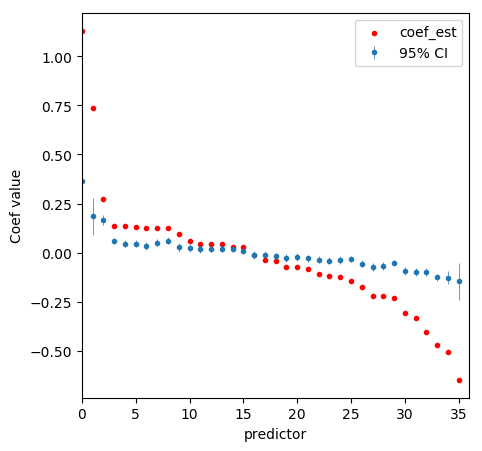

In [38]:
sig_b = []

# if ci contains 0, then insignificant
for i in range(len(X_train[0])):
    if b_logreg_ci_upper[i]<0 or b_logreg_ci_lower[i]>0:
        row={}
        row["predictor"] = train_df.columns[i]
        row["coef"] = b_logreg[i]
        row["CI 2.5"] = b_logreg_ci_lower[i]
        row["CI 97.5"] = b_logreg_ci_upper[i]
        sig_b.append(row)
    
sig_b_df = pd.DataFrame(sig_b)
sig_b_df = sig_b_df.sort_values("coef", ascending=False)
sig_b_df[["predictor","coef","CI 2.5","CI 97.5"]].head()

# plot
plt.figure(figsize=(5,5))
plt.errorbar(range(sig_b_df.shape[0]), 
             0.5*sig_b_df["CI 97.5"]+0.5*sig_b_df["CI 2.5"], 
             yerr=sig_b_df["CI 97.5"]-sig_b_df["CI 2.5"],
             fmt='.',
             marker=None,
             elinewidth=0.5,
             label="95% CI"
         )
plt.scatter(range(sig_b_df.shape[0]), sig_b_df["coef"], color='red', label="coef_est", marker='.')
plt.xlim((0,sig_b_df.shape[0]))
plt.xlabel("predictor")
plt.ylabel("Coef value")
plt.legend()

In [39]:
## 6. Evaluate model on test data & plot 

y_hat_test_large = logregcv.predict(X_test_large)

print("Test accuracy excluding training and testing data in Q.4: ", accuracy_score(y_test_large, y_hat_test_large))

conf_mat_large = confusion_matrix(y_test_large, y_hat_test_large)
conf_df_large = pd.DataFrame(conf_mat_large, columns = ['y_hat=false', 'y_hat = true'], index = ['y=false', 'y=true'])
conf_df_large

Test accuracy excluding training and testing data in Q.4:  0.906921656739


,y_hat=false,y_hat = true
y=false,178918,1466
y=true,17238,3327


In [40]:
print("True Positive Rate for Fitted: ", float(conf_mat_large[1][1])/(conf_mat_large[1][1]+ conf_mat_large[1][0]))
print("True Negative Rate for Fitted: ", float(conf_mat_large[0][0])/(conf_mat_large[0][0] + conf_mat_large[0][1]))

True Positive Rate for Fitted:  0.16177972283
True Negative Rate for Fitted:  0.991872893383


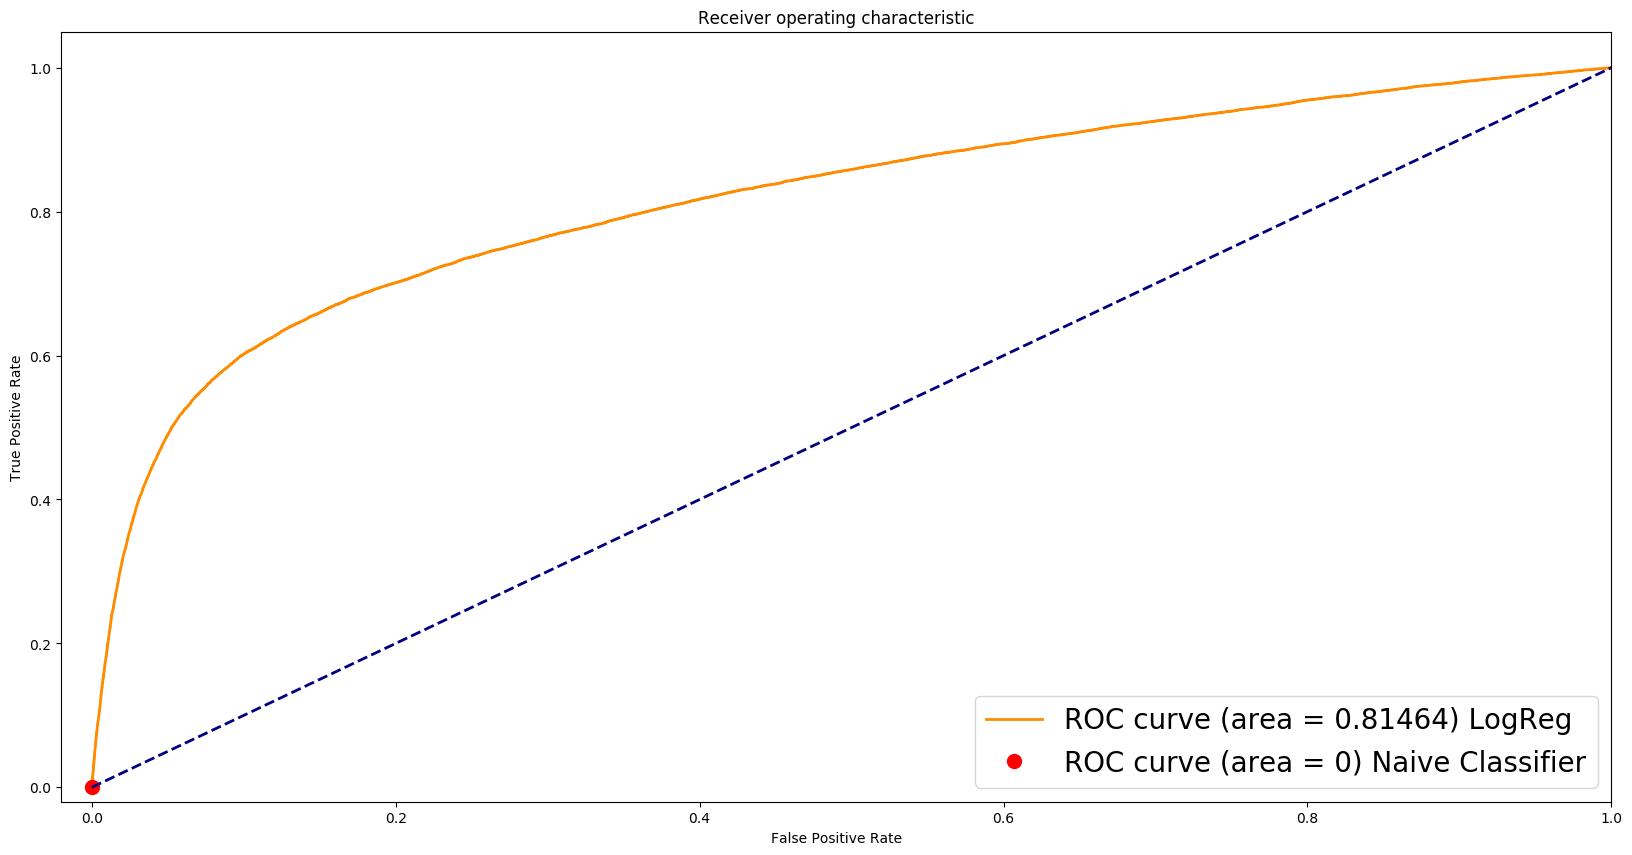

In [41]:
preds_large = logregcv.predict_proba(X_test_large)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_large, preds_large)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_large, [0 for y in y_test_large])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

In [42]:
df2 = pd.read_csv('data/cs109a_midterm.csv')
df2 = df2[~msk]

In [43]:
df2['DELAY_OR_NOT_pred'] = y_hat_test_large
df2.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT_pred
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,False
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,False
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,False
7,2015-01-26,1,26,1,DL,1724,N951DL,BDL,ATL,18:13:00,...,-5.0,859,172.0,157.0,NaN,NaN,NaN,NaN,NaN,False
8,2015-09-17,9,17,4,VX,162,N639VA,LAX,EWR,08:25:00,...,-21.0,2454,325.0,307.0,NaN,NaN,NaN,NaN,NaN,False


In [44]:
# delay_rate ~ airlines
airline_count_2 = df2.groupby('AIRLINE').DELAY_OR_NOT_pred.count()
airline_delay_2 = df2.groupby('AIRLINE').DELAY_OR_NOT_pred.sum()
airline_delay_rate_2 = airline_delay_2 / airline_count_2

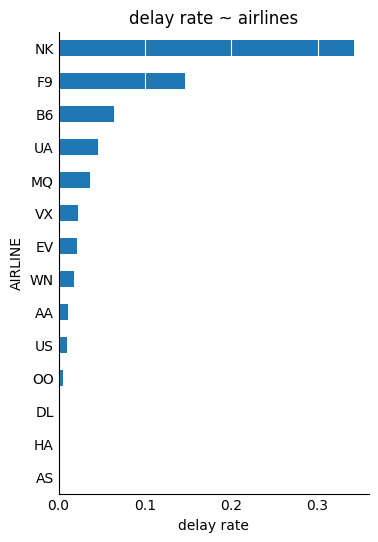

In [45]:
sns.reset_defaults()
plt.figure(figsize=(4, 6))
ax = plt.gca()
airline_delay_rate_2 = airline_delay_rate_2.sort_values()
airline_delay_rate_2.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay rate')
plt.title('delay rate ~ airlines')
sns.despine()

In [46]:
## 7. Regression model
## log_trasnform
train_df2['ARRIVAL_DELAY'] = train_df2['ARRIVAL_DELAY'].apply(lambda x : np.log(x))
test_df2['ARRIVAL_DELAY'] = test_df2['ARRIVAL_DELAY'].apply(lambda x : np.log(x))

In [47]:
y_train_2 = train_df2.ARRIVAL_DELAY.values
y_test_2 = test_df2.ARRIVAL_DELAY.values

In [48]:
train_df2 = train_df2.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)
test_df2 = test_df2.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)

In [49]:
X_train_2 = train_df2.iloc[:,:].values
X_test_2 = test_df2.iloc[:,:].values

In [50]:
std_scale_2 = preprocessing.StandardScaler().fit(X_train_2)
X_train_2 = std_scale.transform(X_train_2)
X_test_2 = std_scale.transform(X_test_2)

In [51]:
clf = RidgeCV(fit_intercept=True, normalize=True)
clf.fit(X_train_2, y_train_2)
print('Ridge Train Score', clf.score(X_train_2, y_train_2))
print('Ridge Test Score', clf.score(X_test_2, y_test_2))

Ridge Train Score 0.0396178915542
Ridge Test Score 0.0358379179003


In [52]:
clf = LinearRegression(fit_intercept=True, normalize=True)
clf.fit(X_train_2, y_train_2)
print('ols Train Score', clf.score(X_train_2, y_train_2))
print('ols Test Score', clf.score(X_test_2, y_test_2))

Ridge Train Score 0.0432763950637
Ridge Test Score 0.0371993999031


In [53]:
clf = LassoCV(fit_intercept=True, normalize=True)
clf.fit(X_train_2, y_train_2)
print('Lasso Train Score', clf.score(X_train_2, y_train_2))
print('Lasso Test Score', clf.score(X_test_2, y_test_2))

Lasso Train Score 0.0432600042564
Lasso Test Score 0.0373620166615


In [54]:
x_inter = PolynomialFeatures(degree=2, interaction_only=False).fit_transform(X_train_2)
interactive_test = PolynomialFeatures(degree=2, interaction_only=False).fit_transform(X_test_2)

In [55]:
clf_inter = RidgeCV(fit_intercept=True, normalize=True)
clf_inter.fit(x_inter, y_train_2)
print('Ridge Train Score', clf_inter.score(x_inter, y_train_2))
print('Ridge Test Score', clf_inter.score(interactive_test, y_test_2))

Ridge Train Score 0.0965236281538
Ridge Test Score 0.0527132497828


In [56]:
clf_inter_lasso = LassoCV(fit_intercept=True, normalize=True, max_iter= 200)
clf_inter_lasso.fit(x_inter, y_train_2)
print('Lasso Train Score', clf_inter_lasso.score(x_inter, y_train_2))
print('Lasso Test Score', clf_inter_lasso.score(interactive_test, y_test_2))

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Train Score 0.0825069918052
Lasso Test Score 0.0555041876101


In [57]:
ols_new = LinearRegression(fit_intercept=True, normalize=True)
ols_new.fit(x_inter, y_train_2)
print('ols Train Score', ols_new.score(x_inter, y_train_2))
print('ols Test Score', ols_new.score(interactive_test, y_test_2))

ols Train Score 0.0914741654516
ols Test Score 0.0402182877052





### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

In [ ]:
np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.75
train_df_3 = df[msk]
test_df_3 = df[~msk]

y_train_large_3 = train_df_3.DELAY_OR_NOT.values
y_test_large_3 = test_df_3.DELAY_OR_NOT.values

In [ ]:
train_df3 = train_df_3[train_df_3.DELAY_OR_NOT == True]
test_df3 = test_df_3[test_df_3.DELAY_OR_NOT == True]

train_df_3 = train_df_3.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)
test_df_3 = test_df_3.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)

In [60]:
train_df_3.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,DISTANCE,SCHEDULED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,534,487,435,733,135.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,545,356,680,1999,260.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,399,500,555,228,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,482,324,577,737,124.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,420,471,480,1069,166.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
train_df_3.columns

Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'DISTANCE',
       'SCHEDULED_TIME', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6',
       'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12',
       'DAY_2', 'DAY_3', 'DAY_4', 'DAY_5', 'DAY_6', 'DAY_7', 'DAY_8', 'DAY_9',
       'DAY_10', 'DAY_11', 'DAY_12', 'DAY_13', 'DAY_14', 'DAY_15', 'DAY_16',
       'DAY_17', 'DAY_18', 'DAY_19', 'DAY_20', 'DAY_21', 'DAY_22', 'DAY_23',
       'DAY_24', 'DAY_25', 'DAY_26', 'DAY_27', 'DAY_28', 'DAY_29', 'DAY_30',
       'DAY_31', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4',
       'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'AIRLINE_AS',
       'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA',
       'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US',
       'AIRLINE_VX', 'AIRLINE_WN'],
      dtype='object')

In [62]:
X_train_large_3 = train_df_3.iloc[:,:].values
X_test_large_3 = test_df_3.iloc[:,:].values

std_scale = preprocessing.StandardScaler().fit(X_train_large_3)

X_train_large_3 = std_scale.transform(X_train_large_3)
X_test_large_3 = std_scale.transform(X_test_large_3)

In [63]:
tmp = X_train_large_3[:, -15] * X_train_large_3[:, 16]
x_inter = np.concatenate((X_train_large_3, tmp.reshape(-1, 1)), axis = 1)
tmp = X_train_large_3[:, -16] * X_train_large_3[:, 16]
x_inter = np.concatenate((x_inter, tmp.reshape(-1, 1)), axis = 1)

In [64]:
## sub-sample

np.random.seed(6006)
msk_4 = np.random.rand(len(x_inter)) < 0.5
X_train = x_inter[msk_4]
y_train = y_train_large_3[msk_4]
X_test = x_inter[~msk_4]
y_test = y_train_large_3[~msk_4]

In [65]:
# logistic regression cv

logregcv_new = LogisticRegressionCV(random_state = 123) # By default LBGFS induces L2 norm.
logregcv_new.fit(X_train, y_train)
y_hat_train = logregcv_new.predict(X_train)
y_hat_test = logregcv_new.predict(X_test)
print("Train accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", accuracy_score(y_test, y_hat_test))

Train accuracy:  0.907491573556
Test accuracy:  0.90752908514


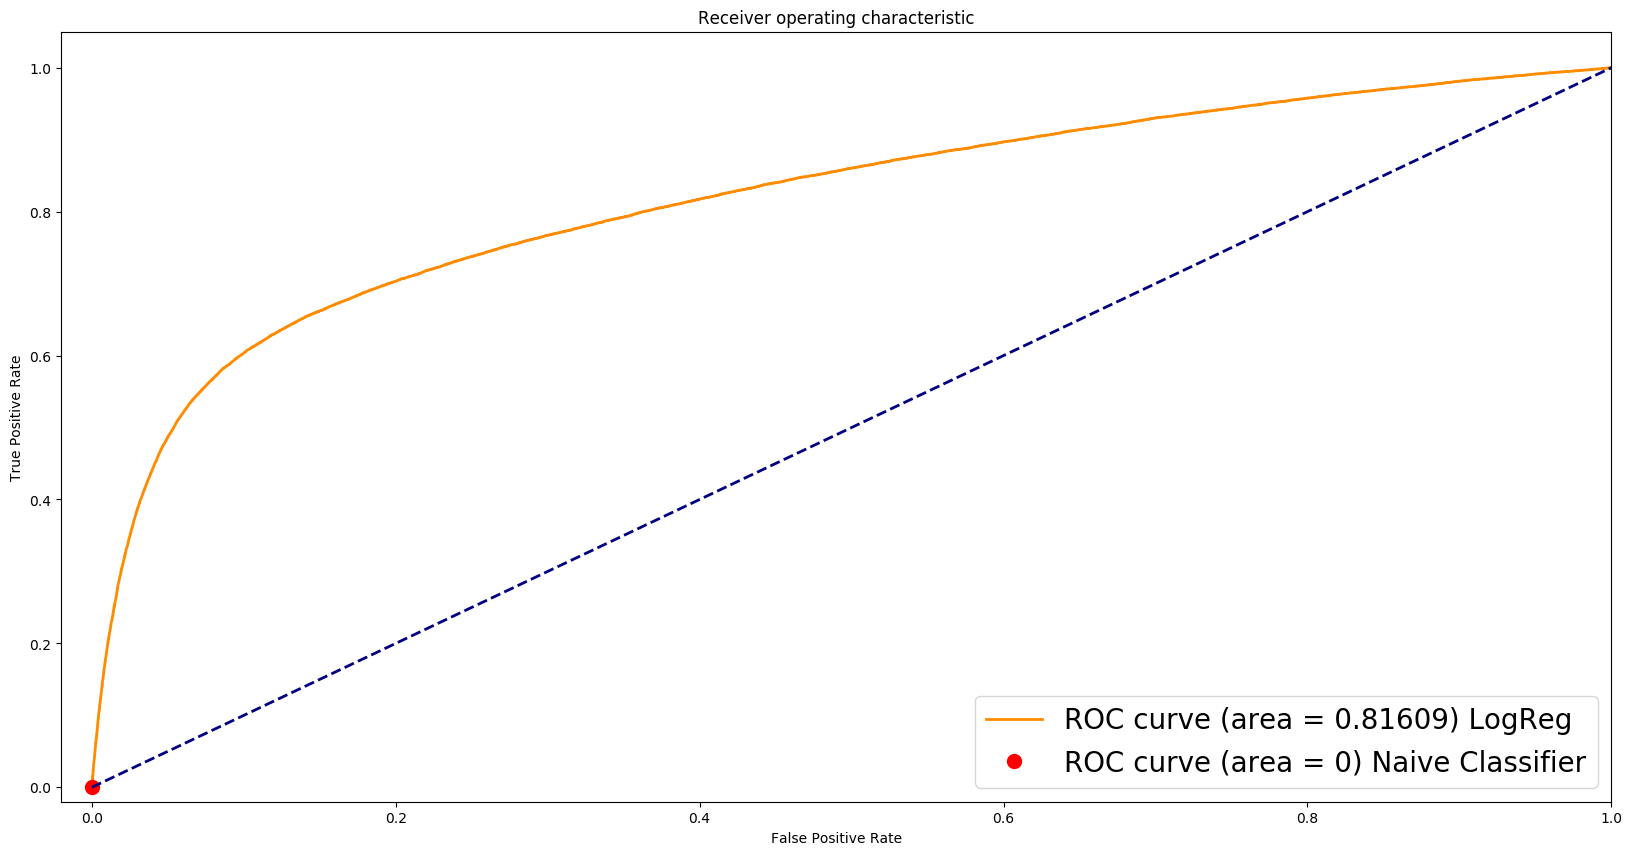

In [66]:
preds = logregcv_new.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

In [67]:
tmp = X_test_large_3[:, -15] * X_test_large_3[:, 16]
x_inter_test = np.concatenate((X_test_large_3, tmp.reshape(-1, 1)), axis = 1)
tmp = X_test_large_3[:, -16] * X_test_large_3[:, 16]
x_inter_test = np.concatenate((x_inter_test, tmp.reshape(-1, 1)), axis = 1)

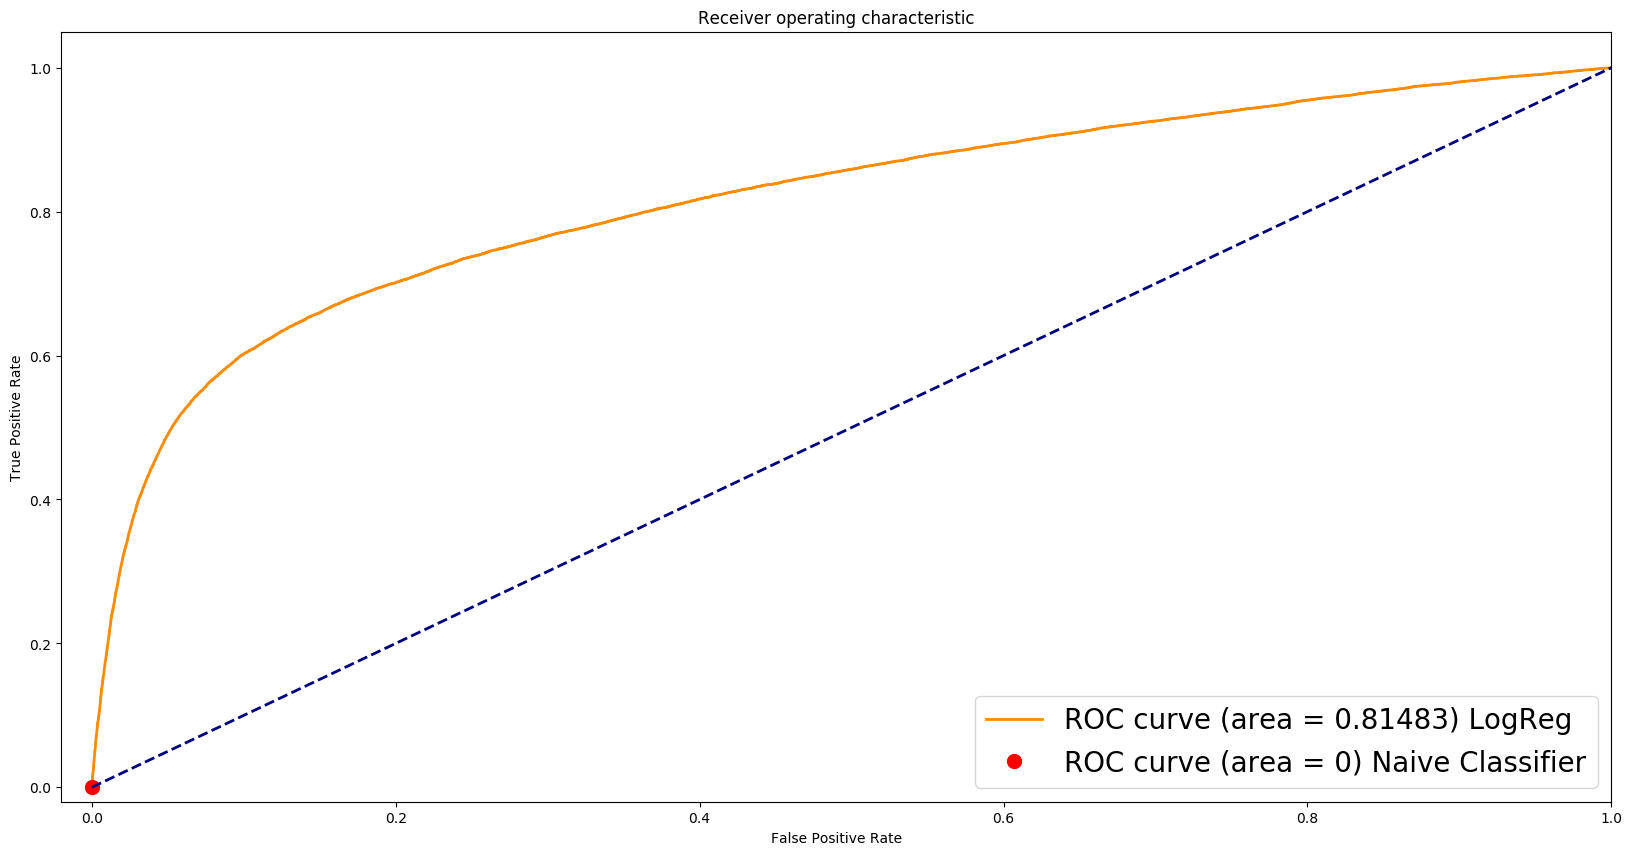

In [68]:
preds_large = logregcv_new.predict_proba(x_inter_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_large_3, preds_large)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_large_3, [0 for y in y_test_large_3])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()